# Skalierung

In [3]:
import pandas as pd
import numpy as np

In [4]:
table = pd.read_csv('melb_data.csv', usecols=["BuildingArea", "Price"])
table.dropna(subset=['BuildingArea'], inplace=True)

area = np.array(table['BuildingArea'][:100])
price = np.array(table['Price'][:100])

table

Price  BuildingArea
1      1035000.0          79.0
2      1465000.0         150.0
4      1600000.0         142.0
6      1876000.0         210.0
7      1636000.0         107.0
...          ...           ...
13572   650000.0          79.0
13573   635000.0         172.0
13576  1031000.0         133.0
13578  2500000.0         157.0
13579  1285000.0         112.0

[7130 rows x 2 columns]

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Create one feature array for "building area".
# Prepend x_0 = 1
X=[]
for row in area:
    X.append([1, row])

X = np.array(X)
Y = np.array(price)

<Axes: >

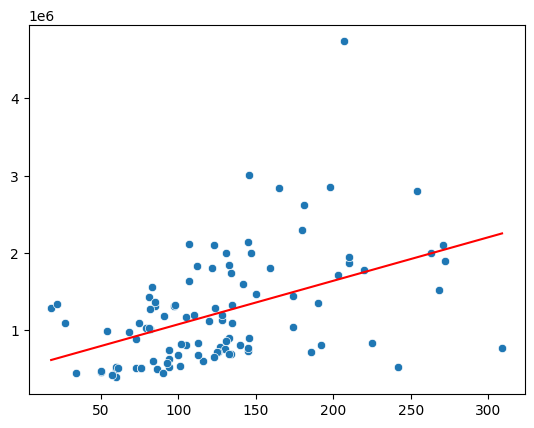

In [7]:
# Solve for theta with scikit learn
# Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X, Y)

# Plot solution.
fig, ax = plt.subplots()
sns.scatterplot(x=area, y=price, ax=ax)
sns.lineplot(x=[min(area), max(area)], y=[model.predict([[1, min(area)]])[0], model.predict([[1, max(area)]])[0]], ax=ax, color='red') 

# Normalization

Transformation:

$$
\overline{x}_j = \frac{x_j - \min_i x_j^{(i)}}{\max_i x_j^{(i)} - \min_i x_j^{(i)}}
$$

Rücktransformation:

$$
    \overline{y} = y \cdot (\max_i x_j^{(i)} - \min_i x_j^{(i)}) + \min_i x_j^{(i)}
$$

<Axes: >

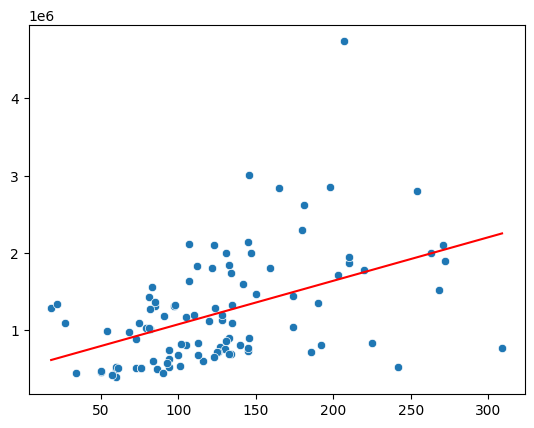

In [8]:
def normalize(x):

    x_min = min(x)
    x_max = max(x)

    return [ (x_i - x_min) / (x_max - x_min) for x_i in x ]

def denormalize(Y, y):
    y_min = min(Y)
    y_max = max(Y)

    return y * (y_max - y_min) + y_min

# Solve for theta with scikit learn
# Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

x_norm = normalize(area)
y_norm = normalize(price)

# Create one feature array for "building area".
# Prepend x_0 = 1
X_norm=[]
for row in x_norm:
    X_norm.append([1, row])

X_norm = np.array(X_norm)
Y_norm = np.array(y_norm)

model.fit(X_norm, Y_norm)

y_vals = [
    denormalize(price, model.predict([[1, min(x_norm)]])[0]),
    denormalize(price, model.predict([[1, max(x_norm)]])[0])
]

# Plot solution.
fig, ax = plt.subplots()
sns.scatterplot(x=area, y=price, ax=ax)
sns.lineplot(x=[min(area), max(area)], y=y_vals, ax=ax, color='red') 

# Standardization

Transformation:
$$
\mu_j = \frac{1}{n} \sum_{i=1}^n x_j^{(i)}
$$
$$
\sigma_j = \sqrt{ \frac{1}{n} \sum_{i=1}^n (x_j^{(i)} - \mu_j^{(i)}) }
$$
$$
\overline{x_j} = \frac{x_j - \mu_j}{\sigma_j}
$$

Rücktransformation:

$$
    y = \overline{y} \cdot \sigma_y + \mu_y
$$


<Axes: >

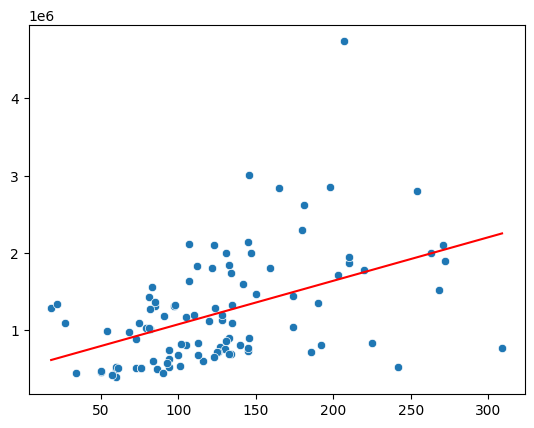

In [9]:
import math

def standardize(x):

    u = sum(x)/len(x)

    o = math.sqrt(sum( (xj - u)**2 for xj in x)/len(x))

    return [(xj - u) / o for xj in x]

def denstandardize(Y, y):
    u = sum(Y)/len(Y)

    o = math.sqrt(sum( (xj - u)**2 for xj in Y)/len(Y))

    return y * o + u

# Solve for theta with scikit learn
# Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

x_norm = standardize(area)
y_norm = standardize(price)

# Create one feature array for "building area".
# Prepend x_0 = 1
X_norm=[]
for row in x_norm:
    X_norm.append([1, row])

X_norm = np.array(X_norm)
Y_norm = np.array(y_norm)

model.fit(X_norm, Y_norm)

y_vals = [
    denstandardize(price, model.predict([[1, min(x_norm)]])[0]),
    denstandardize(price, model.predict([[1, max(x_norm)]])[0])
]

# Plot solution.
fig, ax = plt.subplots()
sns.scatterplot(x=area, y=price, ax=ax)
sns.lineplot(x=[min(area), max(area)], y=y_vals, ax=ax, color='red') 

# R2 für unskalierte Daten

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X, Y)

def J(theta, x, y):
    '''Quadratic error function used by linear regression'''
    return sum([((theta[0] + theta[1] * x[i][1]) - y[i])**2 for i in range(len(x))]) * 0.5 / len(x)

MSE = 2 * J(model.coef_, X, Y)

average_price = sum(Y)/len(Y)
variance = sum([(y - average_price)**2 for y in Y]) / len(Y)
R2 = 1 - MSE / variance
R2

np.float64(-0.29961445678393317)

# R2 für normalisierte Daten

In [12]:
def normalize(x):

    x_min = min(x)
    x_max = max(x)

    return [ (x_i - x_min) / (x_max - x_min) for x_i in x ]

def denormalize(Y, y):
    y_min = min(Y)
    y_max = max(Y)

    return y * (y_max - y_min) + y_min

# Solve for theta with scikit learn
# Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

x_norm = normalize(area)
y_norm = normalize(price)

# Create one feature array for "building area".
# Prepend x_0 = 1
X_norm=[]
for row in x_norm:
    X_norm.append([1, row])

X_norm = np.array(X_norm)
Y_norm = np.array(y_norm)

model.fit(X_norm, Y_norm)

def J(theta, x, y):
    '''Quadratic error function used by linear regression'''
    return sum([((theta[0] + theta[1] * x[i][1]) - y[i])**2 for i in range(len(x))]) * 0.5 / len(x)

MSE = 2 * J(model.coef_, X_norm, Y_norm)

average_price = sum(Y_norm)/len(Y_norm)
variance = sum([(y - average_price)**2 for y in Y_norm]) / len(Y_norm)
R2 = 1 - MSE / variance
R2

np.float64(0.11734030806790186)